# **About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwido
blem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


In [99]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# **Explore the Dataset**

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [101]:
df.shape

(550068, 10)

In [102]:
df.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

# **To find Null values**

In [103]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Insight as follows** : The above dataset contain zero Null values. No Missing values.

# **To change the datatype of the variables**

In [104]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')
columns = ['Marital_Status','Age','Stay_In_Current_City_Years']
df[columns] = df[columns].astype('category')
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                          object
Age                           category
Occupation                       int64
City_Category                   object
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category                 int64
Purchase                         int64
dtype: object

In [105]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [106]:
# For measurable quantities
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,Single,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


# **Perform Value counts on the categorical variables**

In [107]:
cols = df.columns
print(cols)
for i in cols:
    if (df[i].dtype == 'category') or (df[i].dtype=='object') and not(i == 'Product_ID'):
        print(f'\n {df[i].value_counts()}')
        print("-"*50)
        print(f'Percentage distribution:\n {np.round((df[i].value_counts()/len(df))*100,2)}')
        print("="*80)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

 Gender
M    414259
F    135809
Name: count, dtype: int64
--------------------------------------------------
Percentage distribution:
 Gender
M    75.31
F    24.69
Name: count, dtype: float64

 Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
--------------------------------------------------
Percentage distribution:
 Age
26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: count, dtype: float64

 City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
--------------------------------------------------
Percentage distribution:
 City_Category
B    42.03
C    31.12
A    26.85
Name: count, dtype: float64

 Stay_In_Current_City

**Conclusion** : *Basesd on the df.describe and value counts the observations are below*

*1. Male gender purchased more- 75% of users are male and 25% are female.*

*2. 26-35 age people purchased more - Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%, and very low users ages ( 0–17 & 55+ )are 5%*

*3. City B people purchased more- 35% stay in a city for 1 year, 18% stay in a city for 2 years, 17% stay in a city for 3 years, and 15% stay in a city for 4+ years.*

*4. Single people purchased more compared to the married people- 60% of users are single, and 40% are married.*



# **Unique Attributes**

In [108]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


In [109]:
cols=['User_ID','Product_ID']
for i in cols:
    print(f"Unique counts of the {i} : {df[i].nunique()}")

Unique counts of the User_ID : 5891
Unique counts of the Product_ID : 3631


**Conclusion:**: 

*The total number of unique product IDs is 3631*

*The total number of unique user IDs is 5891*

# **Visual Analysis- Univariate & Bivariate***

# **BarPlot- Gender vs Purchase**

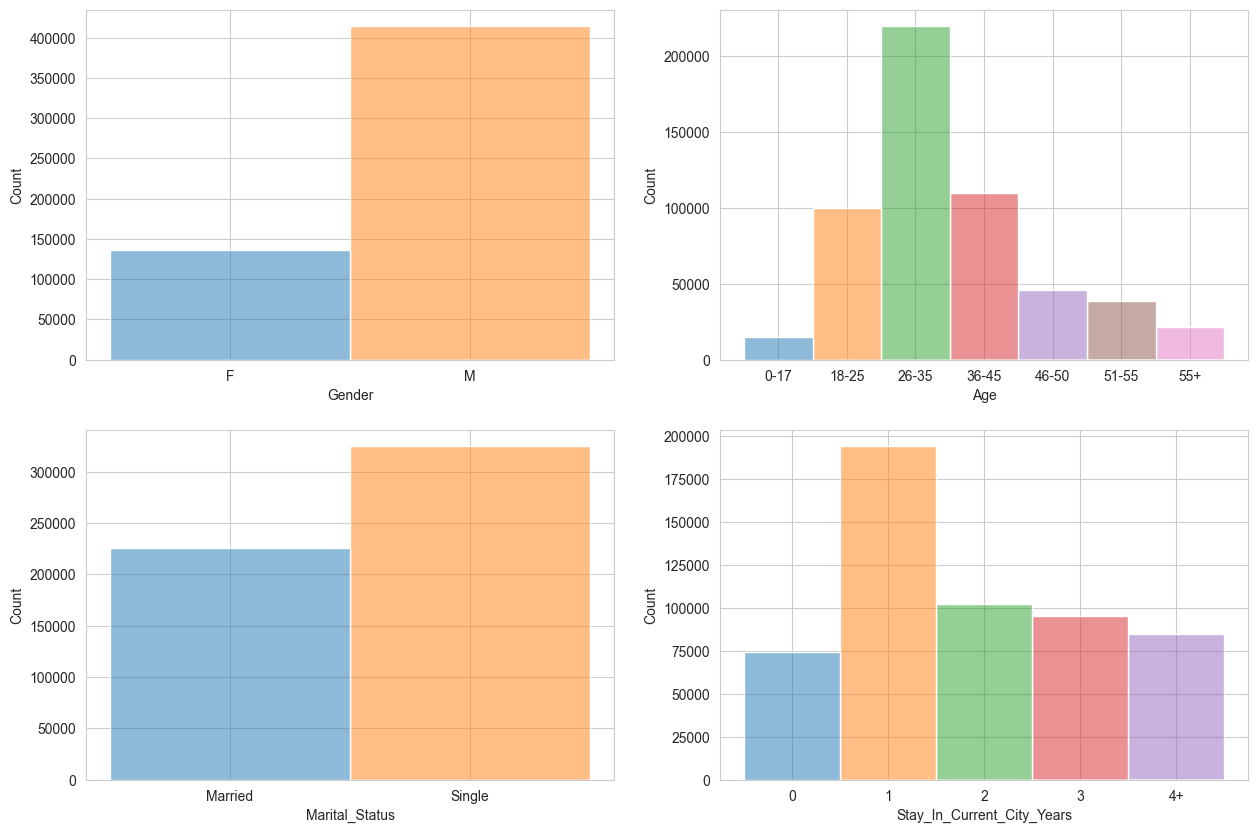

In [110]:
fig, axis = plt.subplots(nrows = 2, ncols=2, figsize=(15,10))
sns.set_style('darkgrid')
sns.histplot(data=df,x='Gender',hue='Gender',legend=False,ax=axis[0,0],color='orange')
sns.histplot(data=df,x='Age',hue='Age',legend=False,ax=axis[0,1],color='blue')
sns.histplot(data=df,x='Marital_Status',hue='Marital_Status',legend=False,ax=axis[1,0])
sns.histplot(data=df,x='Stay_In_Current_City_Years',hue='Stay_In_Current_City_Years',legend=False,ax=axis[1,1],color='green')
plt.show()

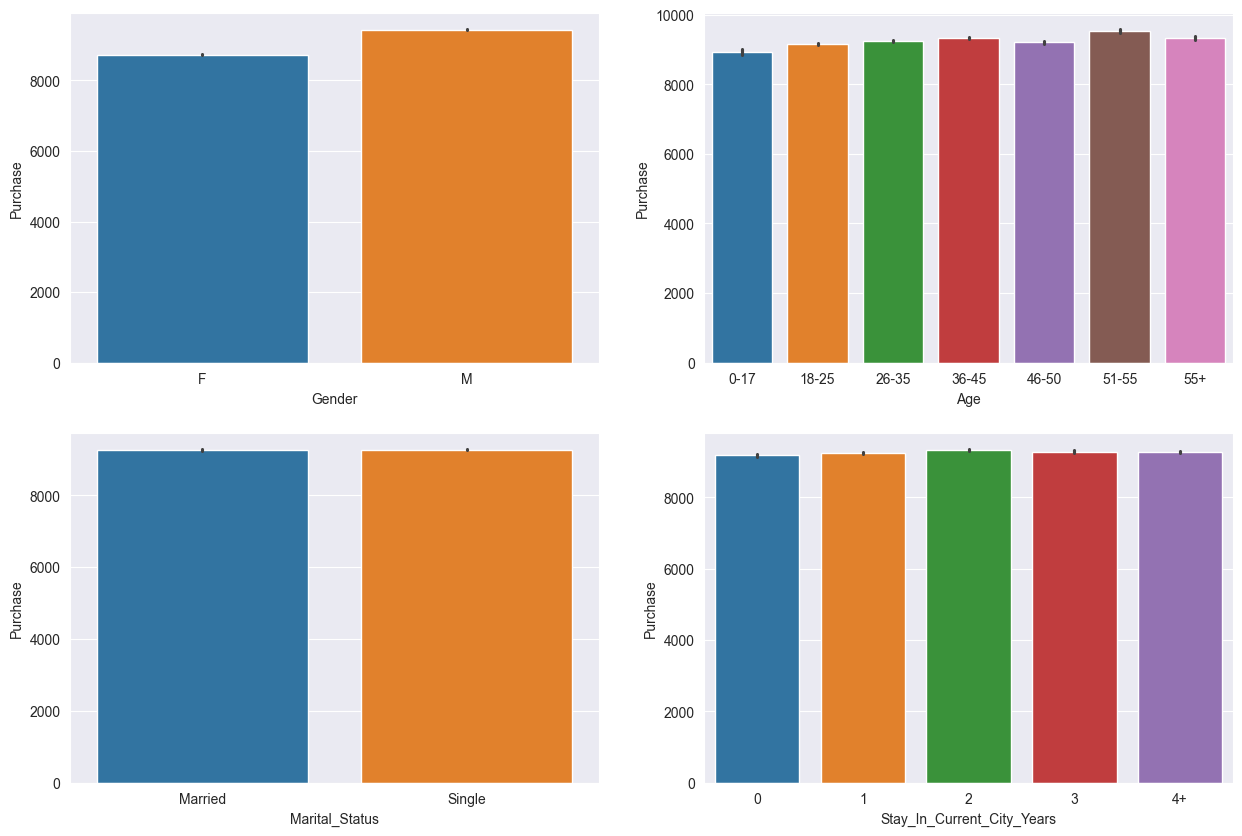

In [111]:
fig, axis = plt.subplots(nrows = 2, ncols=2, figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(data=df,x='Gender',hue='Gender',y='Purchase',legend=False,ax=axis[0,0])
sns.barplot(data=df,x='Age',hue='Age',y='Purchase',legend=False,ax=axis[0,1])
sns.barplot(data=df,x='Marital_Status',y='Purchase',hue='Marital_Status',legend=False,ax=axis[1,0])
sns.barplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',hue='Stay_In_Current_City_Years',legend=False,ax=axis[1,1])
plt.show()

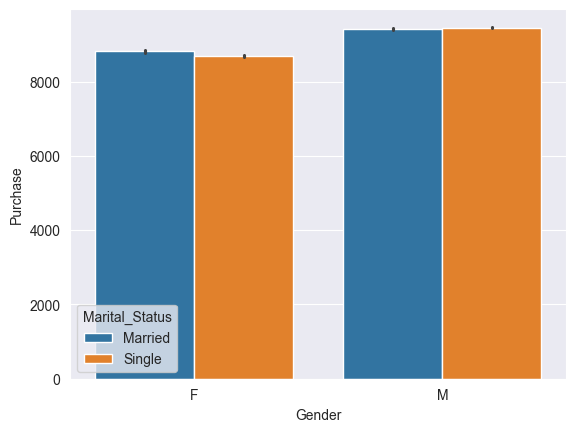

In [112]:

sns.barplot(x='Gender',y='Purchase',hue='Marital_Status',data=df)
plt.show()

**Conclusion**:

  *There is no difference in the purchase limit for the married and single category among male and Female*

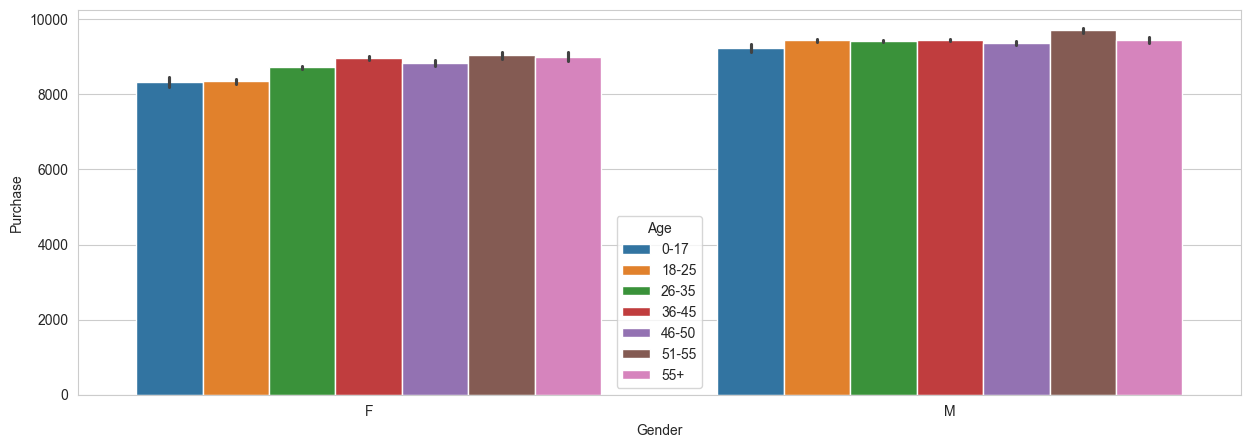

In [113]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.barplot(x='Gender',y='Purchase',hue='Age',data=df)
plt.show()

**Conclusion:**

*
There is no difference in the purchase limit for thagele category among male and Fema*le

<Axes: xlabel='Age', ylabel='Purchase'>

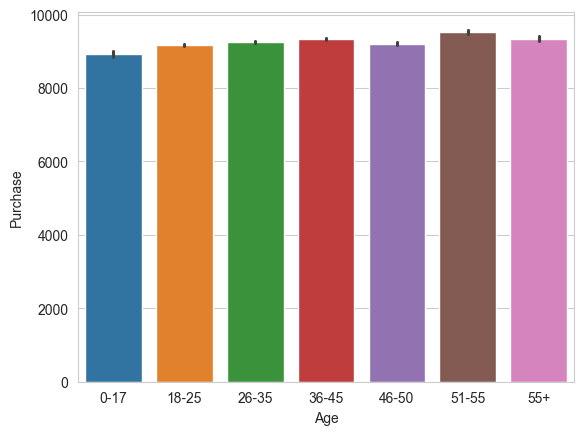

In [114]:
sns.barplot(y='Purchase',hue='Age',x='Age',data=df,legend=False)

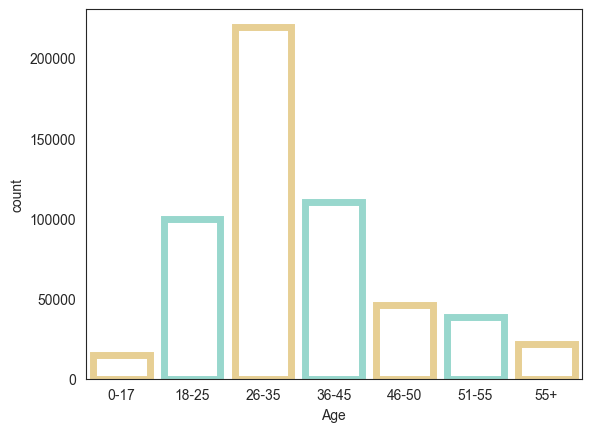

In [115]:
sns.set_style('white')
sns.countplot(x ='Age', data = df,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2))
plt.show()

# **Outlier detection**

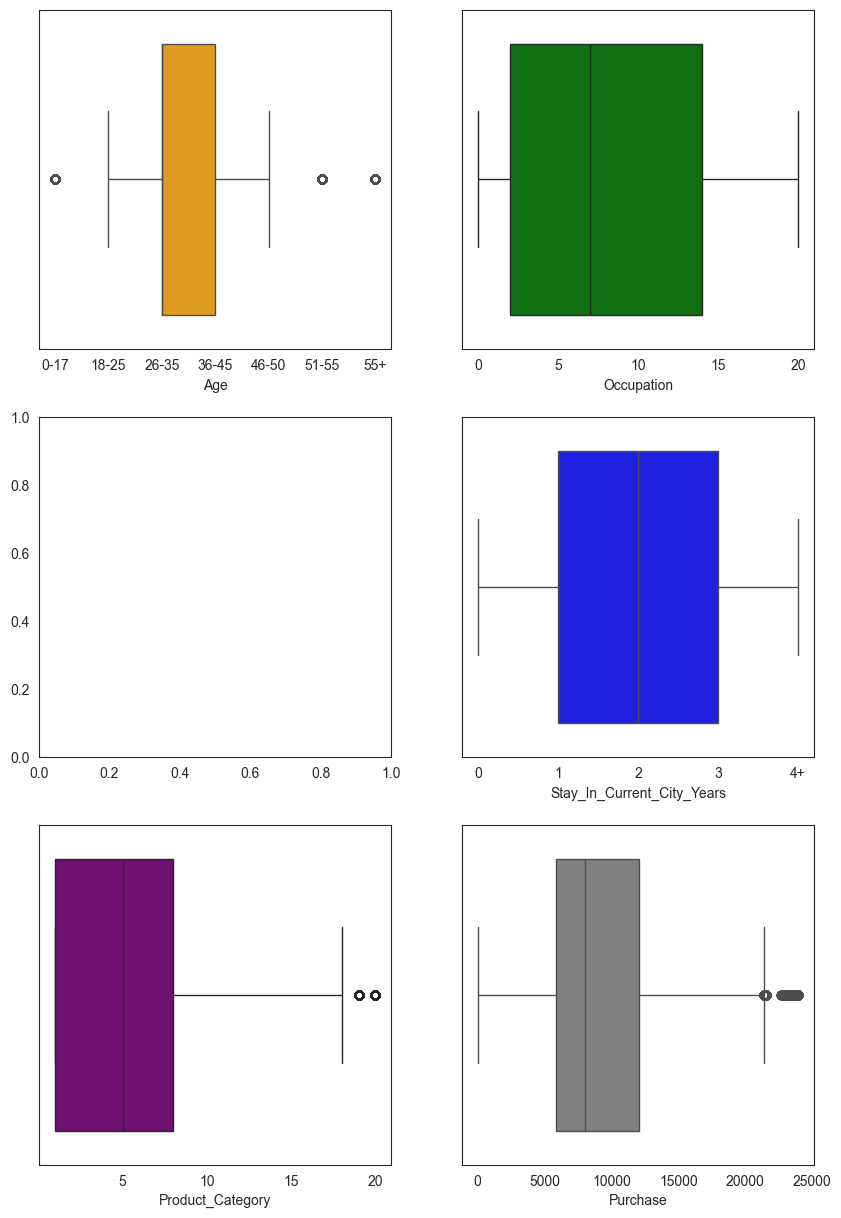

In [116]:
fig,axis = plt.subplots(nrows=3, ncols=2,figsize=(10,15))
sns.set_style('whitegrid')
sns.boxplot(data=df,x='Age',color='orange',ax=axis[0,0])
sns.boxplot(data=df,x='Occupation',color='green',ax=axis[0,1])
sns.boxplot(data=df,x='Stay_In_Current_City_Years',color='blue',ax=axis[1,1])
sns.boxplot(data=df,x='Product_Category',color='purple',ax=axis[2,0])
sns.boxplot(data=df,x='Purchase',color='grey',ax=axis[2,1])
plt.show()

**Conclusion**:

*1. **Age:** 75% of the people age lies between the age 18-25 and 36-45        ==> outliers are present*

*2. **Occupation:** 75% of people occupation lies between 0 to 15(approx.)     ==> No Outliers*

*3. **Stay_in_current_city:** No outliers*

*4. **Product_category:** 50% of people bought products from 0 to 5 category   ==> No outliers*

*5. **Purchase**:25% to 75% of puchases are lies between 5000(approx.) to 13000(approx.)==> Outliers are present*

In [117]:
dataaa=df['Age'].value_counts(normalize=True)
print(dataaa)
dataaa.index

Age
26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: proportion, dtype: float64


CategoricalIndex(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], categories=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], ordered=False, dtype='category', name='Age')

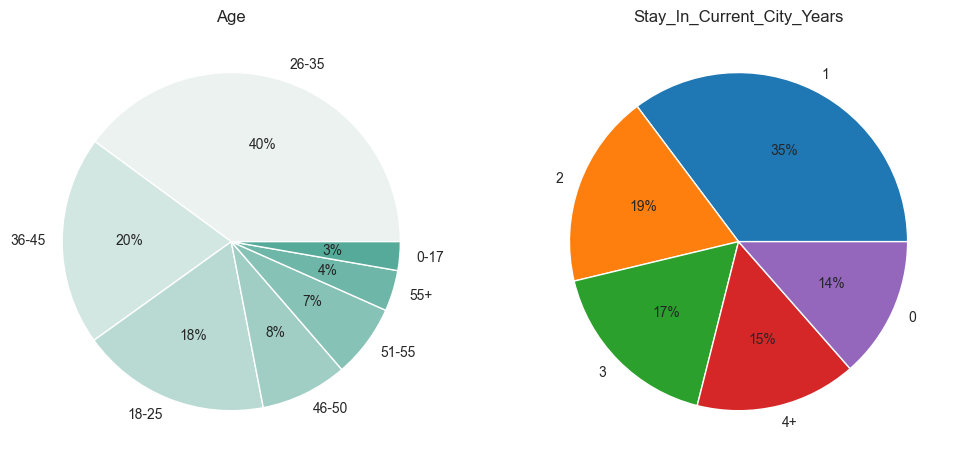

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
unique_colors_age = sns.color_palette("light:#5A9", len(df['Age'].unique()))

data_age = df['Age'].value_counts(normalize=True) *100
axs[0].pie(x=data_age.values, autopct='%.0f%%',labels=data_age.index,colors=unique_colors_age)
axs[0].set_title("Age")

data_city_years = df['Stay_In_Current_City_Years'].value_counts(normalize=True) * 100
axs[1].pie(x=data_city_years.values,autopct='%.0f%%', labels=data_city_years.index)
axs[1].set_title("Stay_In_Current_City_Years")
plt.show()

**Insights :**
*
.) Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%, users ages 46–50 are 8%, users ages 51–55 are 7%, users ages 55+ are      4%, and very low users ages 0–17 are 2%*


*2.  35% stay in a city for 1 year, 19% stay in a city for 2 years, 17% stay in a city for 3 years, and 15% stay in a city for 4+ years*.

# **Bivarient analysis**

Analyzing the variation in purchases with the following:

Gender vs Purchase

Martial_Status vs Purchase

Age vs Purchase

City_Category vs Purchase


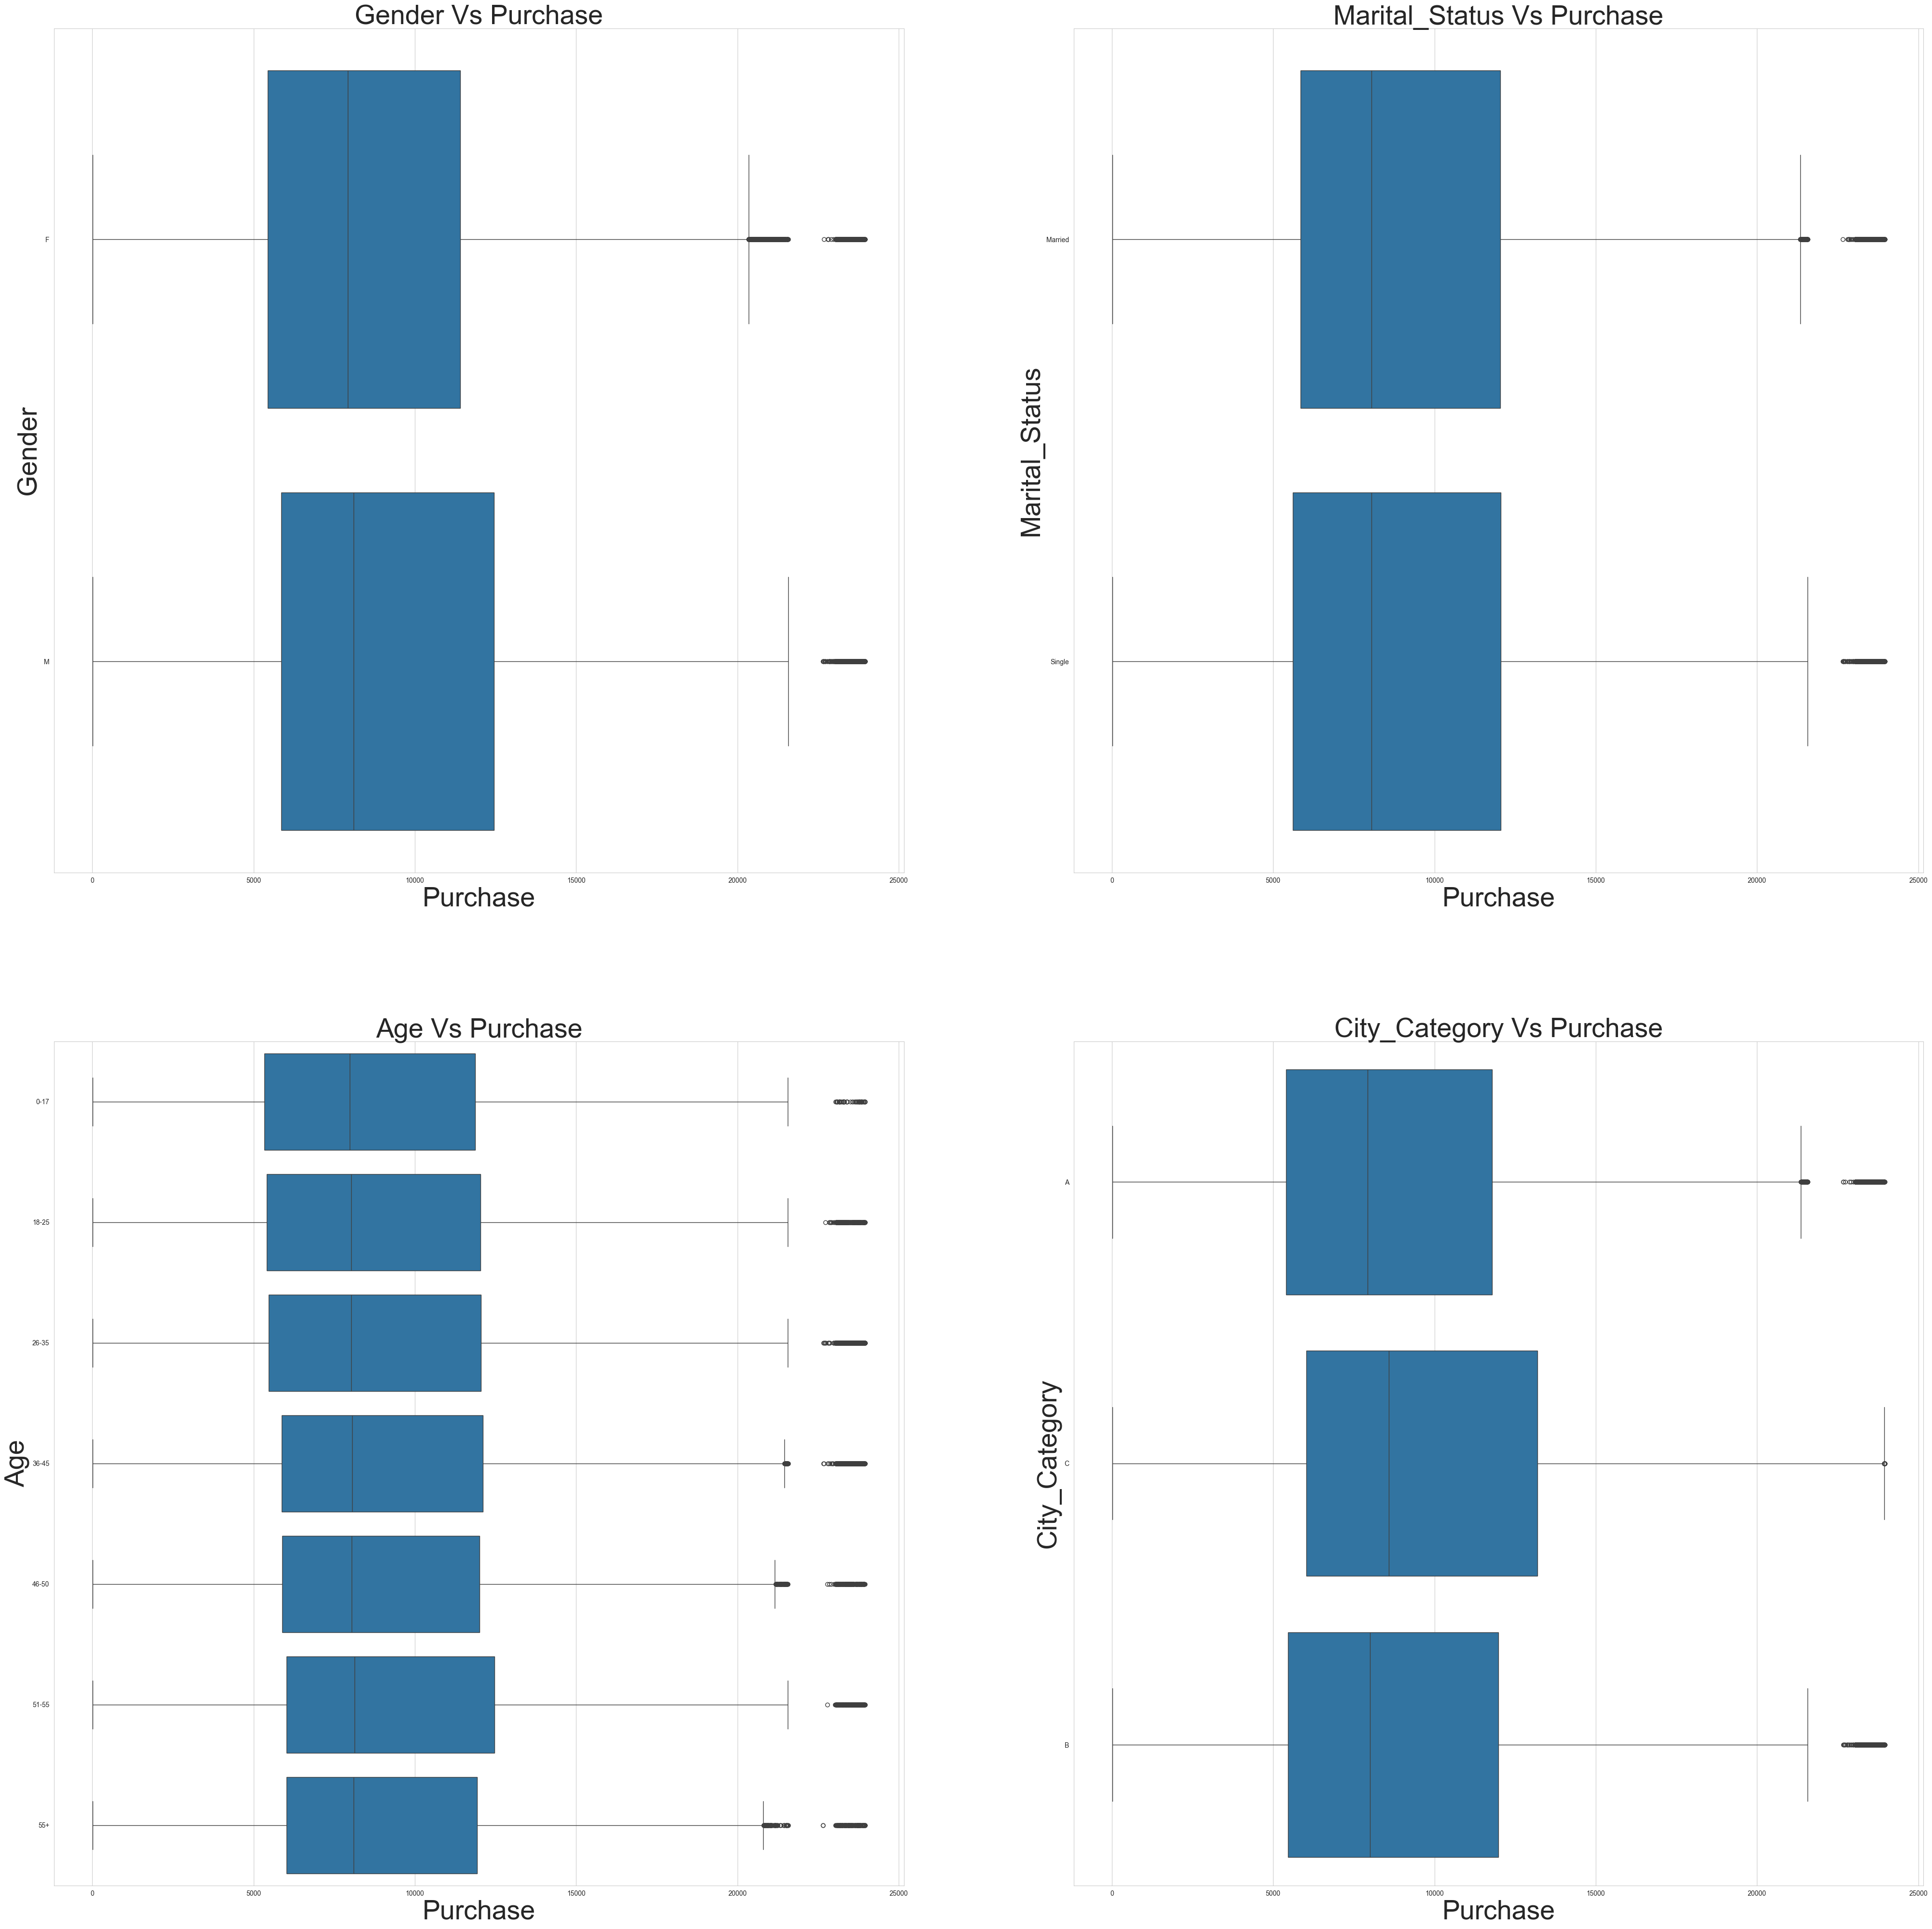

In [119]:
fig1, axs=plt.subplots(nrows=2,ncols=2, figsize=(50,50))
sns.boxplot(data=df,x='Purchase',y='Gender',orient='h', ax=axs[0,0])
axs[0,0].set_title("Gender Vs Purchase",fontsize=40)
axs[0,0].set_xlabel("Purchase",fontsize=40)
axs[0,0].set_ylabel("Gender",fontsize=40)

sns.boxplot(data=df,x='Purchase',y='Marital_Status',orient='h',ax=axs[0,1])

axs[0,1].set_title("Marital_Status Vs Purchase",fontsize=40)
axs[0,1].set_xlabel("Purchase",fontsize=40)
axs[0,1].set_ylabel("Marital_Status",fontsize=40)

sns.boxplot(data=df,x='Purchase',y='Age',orient='h',ax=axs[1,0])

axs[1,0].set_title("Age Vs Purchase",fontsize=40)
axs[1,0].set_xlabel("Purchase",fontsize=40)
axs[1,0].set_ylabel("Age",fontsize=40)

sns.boxplot(data=df,x='Purchase',y='City_Category',orient='h',ax=axs[1,1])

axs[1,1].set_title("City_Category Vs Purchase",fontsize=40)
axs[1,1].set_xlabel("Purchase",fontsize=40)
axs[1,1].set_ylabel("City_Category",fontsize=40)

plt.show()

**Conclusion:**

*1) Gender vs. Purchase : a) The median for males and females is almost equal. b) Females have more outliers compared to males. c) Males purchased more compared to females.*

*2) Martial Status vs. Purchase a) The median for married and single people is almost equal. b) Outliers are present in both records.*

*3) Age vs. Purchase a) The median for all age groups is almost equal. b) Outliers are present in all age groups.*

*4) City Category vs. Purchase a) The C city region has very low outliers compared to other cities. b) A and B city region medians are almost the same.*

# **Detecting Outliers using IQR for the Purchase column**

In [120]:
Q1 = df["Purchase"].quantile(0.25)
Q3 = df["Purchase"].quantile(0.75)
IQR= Q3-Q1
print(f"Quantile 1:{Q1}\nQuantile 2:{Q3}")
print(f"IQR:{IQR}")

Quantile 1:5823.0
Quantile 2:12054.0
IQR:6231.0


In [121]:
mins= Q1- (1.5*IQR)
maxs= Q3+ (1.5*IQR)
print(mins,maxs)

-3523.5 21400.5


In [122]:
outliers = df[(df['Purchase']<mins) | (df['Purchase']>maxs)]['Purchase']

print("number of outliers: "+ str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2677
max outlier value:23961
min outlier value: 21401


# **1. Are women spending more money per transaction than men? Why or Why not?**

In [123]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

**Conclusion:**

*Overall women not spending more money than men per transaction*

# =====================================
# **Are women spending more money per transaction than men based on the age category? Why or Why not?**

# =====================================

In [124]:
#Lets see Age wise
a= pd.DataFrame(df.groupby(['Age','Gender'],observed=False)['Purchase'].mean())
a.reset_index(inplace=True)

In [125]:
a

,Age,Gender,Purchase
0,0-17,F,8338.771985
1,0-17,M,9235.173670
2,18-25,F,8343.180201
3,18-25,M,9440.942971
4,26-35,F,8728.251754
5,26-35,M,9410.337578
6,36-45,F,8959.844056
7,36-45,M,9453.193643
8,46-50,F,8842.098947
9,46-50,M,9357.471509


In [126]:
a.groupby('Age',observed=False)['Purchase'].aggregate('max')

Age
0-17     9235.173670
18-25    9440.942971
26-35    9410.337578
36-45    9453.193643
46-50    9357.471509
51-55    9705.094802
55+      9438.195603
Name: Purchase, dtype: float64

In [127]:
a[a['Purchase'].isin(a.groupby('Age',observed=False)['Purchase'].aggregate('max').values)]

,Age,Gender,Purchase
1,0-17,M,9235.173670
3,18-25,M,9440.942971
5,26-35,M,9410.337578
7,36-45,M,9453.193643
9,46-50,M,9357.471509
11,51-55,M,9705.094802
13,55+,M,9438.195603


**Conclusion:**

*For each age category Male gender is higher when compared to female gender in transactions*

In [128]:
cols=['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']

for i in cols:
    a= pd.DataFrame(df.groupby([i,'Gender'],observed=False)['Purchase'].mean())
    a.reset_index(inplace=True)
    print(f"Top Gender transaction in {i}:\n{a[a['Purchase'].isin(a.groupby(i,observed=False)['Purchase'].aggregate('max').values)]}")
    print("="*80)

Top Gender transaction in Occupation:
    Occupation Gender      Purchase
1            0      M   9228.799538
3            1      M   9231.961755
5            2      M   9213.158472
7            3      M   9279.059603
9            4      M   9435.676366
11           5      M   9446.089083
13           6      M   9375.727101
15           7      M   9493.818898
17           8      M   9584.729114
19           9      M   9226.694196
21          10      M   9302.215302
23          11      M   9232.145350
25          12      M   9876.847492
27          13      M   9485.148154
29          14      M   9804.566923
31          15      M   9872.778721
33          16      M   9477.371520
35          17      M   9851.727696
36          18      F  10074.608696
39          19      M   8797.868870
41          20      M   9015.452547
Top Gender transaction in City_Category:
  City_Category Gender     Purchase
1             A      M  9017.834470
3             B      M  9354.854433
5             C      


# **Conclusion:**

*1. Except 18th Occupation all other occupations male purchase rate is higher compared to the Female*

*2. In all the 3 City category male purchase rate is higher*

*3. Based on the Marital Status male purchase rate is higher*

*4. Based on the product category- 2,3,4,5,7,8,9,10,12,13,14,19,20 For these products female purchase rate is higher when compared to the male*

# **Confidence intervals and distribution of the mean of the expenses by female and male customers**

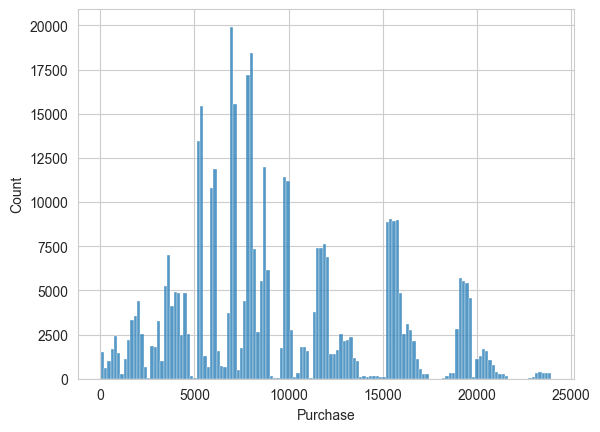

In [129]:
df_male = df[df['Gender']=='M']['Purchase']
sns.histplot(df_male)
plt.show()

In [130]:
df_male

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

In [131]:
sample_10000 = [np.mean(df_male.sample(10000)) for i in range(20000)]


<Axes: ylabel='Count'>

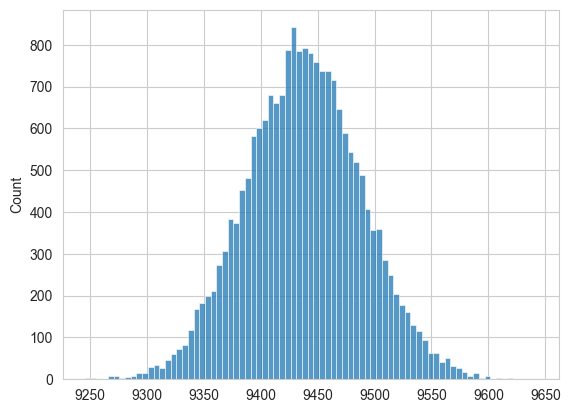

In [132]:
sns.histplot(sample_10000)

In [133]:
def confidence_interval(percentage, mean, sigma):
    p1= ((100-percentage)/2)/100
    z1= norm.ppf(p1)
    lower_range=  mean + (z1*sigma)
    p2= p1+ (percentage/100)
    z2= norm.ppf(p2)
    upper_range=  mean + (z2*sigma)    
    return np.round(lower_range,3), np.round(upper_range,3)
    

In [134]:
male_sample_10000 = np.array(sample_10000)

print(f"The Male population mean: {np.round(df_male.mean(),3)}\nThe Male Population Standard deviation: {np.round(df_male.std(),3)}")
print(f"The Male sample mean: {np.round(male_sample_10000.mean(),3)}\nThe Male sample Standard deviation: {np.round(male_sample_10000.std(),3)}")

male_lower_purchase, male_upper_purchase = confidence_interval(95, male_sample_10000.mean(), df_male.std()/np.sqrt(10000))
print(f"The Population average Male purchase ranges from {male_lower_purchase} to {male_upper_purchase}")


The Male population mean: 9437.526
The Male Population Standard deviation: 5092.186
The Male sample mean: 9437.771
The Male sample Standard deviation: 50.801
The Population average Male purchase ranges from 9337.966 to 9537.576


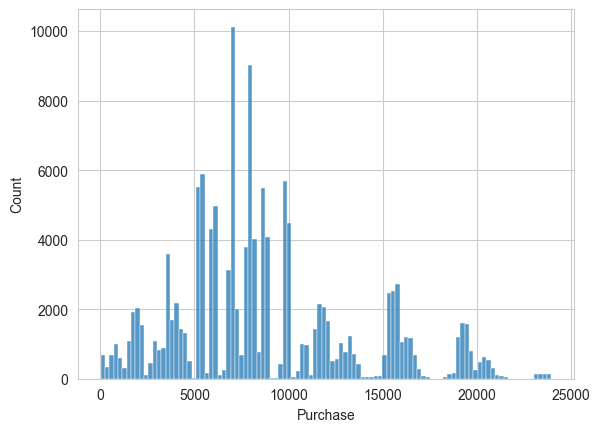

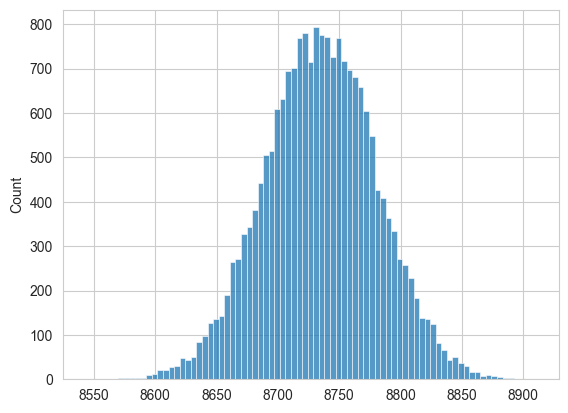

The Female population mean: 8734.566
The Female Population Standard deviation: 4767.233
The Female sample mean: 8734.51
The Female sample Standard deviation: 45.819
The Population average Female purchase ranges from 8641.074 to 8827.946


In [135]:
#Calculate the interval for Female purchase
df_female = df[df['Gender']=='F']['Purchase']
sns.histplot(df_female)
plt.show()
sample_10000_female = [np.mean(df_female.sample(10000)) for i in range(20000)]
sns.histplot(sample_10000_female)
plt.show()
female_sample_10000 = np.array(sample_10000_female)
print(f"The Female population mean: {np.round(df_female.mean(),3)}\nThe Female Population Standard deviation: {np.round(df_female.std(),3)}")
print(f"The Female sample mean: {np.round(female_sample_10000.mean(),3)}\nThe Female sample Standard deviation: {np.round(female_sample_10000.std(),3)}")

female_lower_purchase, female_upper_purchase = confidence_interval(95, female_sample_10000.mean(), df_female.std()/np.sqrt(10000))
print(f"The Population average Female purchase ranges from {female_lower_purchase} to {female_upper_purchase}")

# **Conclusion based on the Male and Female purchase range with 95% confidence**

*The Population average Male purchase ranges from **9337.667 to 9537.277** with 95% confidence with the sample size of 10k*

*The Population average Female purchase ranges from **8641.108 to 8827.98** with 95% confidence with the sample size of 10k*

**Based on the Confidence interval male purchase average is higher compared to the female purchase range. Hence, Male purchase is higher**


# **With 90% Confidence and 99% confidence**

In [136]:

confidence=90
male_lower_purchase, male_upper_purchase = confidence_interval(confidence, male_sample_10000.mean(), df_male.std()/np.sqrt(10000))
print(f"The Population average Male purchase ranges from {male_lower_purchase} to {male_upper_purchase} with 90% confidence")
print("*"*50)

female_lower_purchase, female_upper_purchase = confidence_interval(confidence, female_sample_10000.mean(), df_female.std()/np.sqrt(10000))
print(f"The Population average Female purchase ranges from {female_lower_purchase} to {female_upper_purchase} with 90% confidence\n\n")

print("="*100)
confidence=99

male_lower_purchase, male_upper_purchase = confidence_interval(confidence, male_sample_10000.mean(), df_male.std()/np.sqrt(10000))
print(f"\n\nThe Population average Male purchase ranges from {male_lower_purchase} to {male_upper_purchase} with 99% confidence")
print("*"*50)

female_lower_purchase, female_upper_purchase = confidence_interval(confidence, female_sample_10000.mean(), df_female.std()/np.sqrt(10000))
print(f"The Population average Female purchase ranges from {female_lower_purchase} to {female_upper_purchase} with 99% confidence")


The Population average Male purchase ranges from 9354.012 to 9521.53 with 90% confidence
**************************************************
The Population average Female purchase ranges from 8656.096 to 8812.924 with 90% confidence




The Population average Male purchase ranges from 9306.605 to 9568.937 with 99% confidence
**************************************************
The Population average Female purchase ranges from 8611.714 to 8857.305 with 99% confidence


# **Confidence intervals and distribution of the mean of the expenses by Maritial Status with 95% confidence**

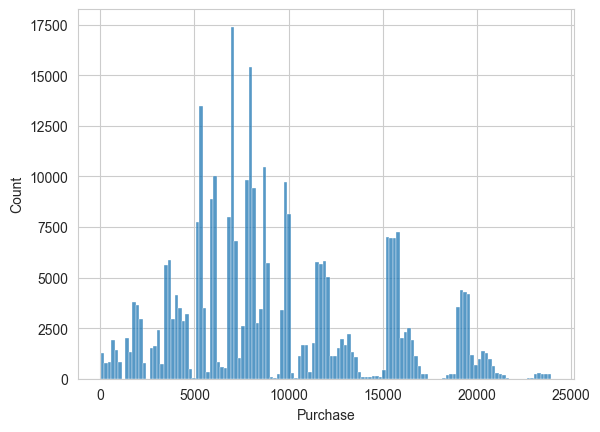

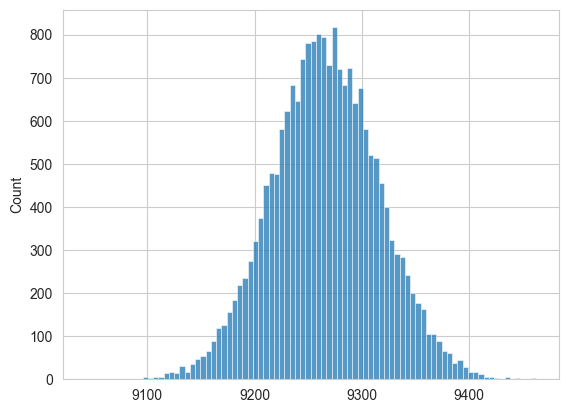

The Single population mean: 9265.908
The Single Population Standard deviation: 5027.348
The Single sample mean: 9265.906
The Single sample Standard deviation: 49.764
The Population average Single purchase ranges from 9167.372 to 9364.44


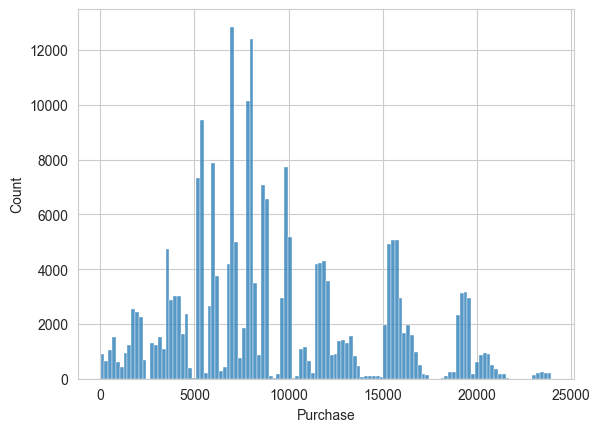

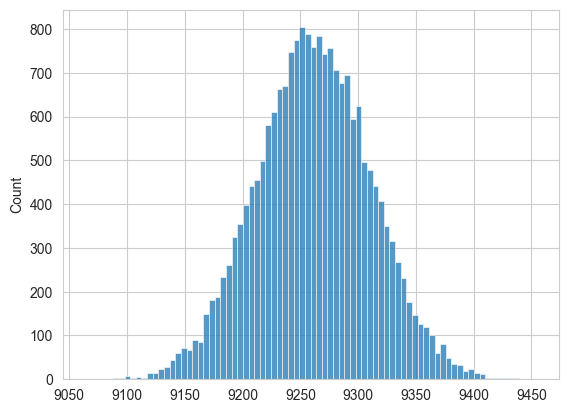

The Married population mean: 9261.175
The Married Population Standard deviation: 5016.897
The Married sample mean: 9261.189
The Married sample Standard deviation: 49.579
The Population average Married purchase ranges from 9162.859 to 9359.518


In [137]:
#Calculate the interval for Single purchase
df_single = df[df['Marital_Status']=='Single']['Purchase']
sns.histplot(df_single)
plt.show()
sample_10000_Single = [np.mean(df_single.sample(10000)) for i in range(20000)]
sns.histplot(sample_10000_Single)
plt.show()
single_sample_10000 = np.array(sample_10000_Single)
print(f"The Single population mean: {np.round(df_single.mean(),3)}\nThe Single Population Standard deviation: {np.round(df_single.std(),3)}")
print(f"The Single sample mean: {np.round(single_sample_10000.mean(),3)}\nThe Single sample Standard deviation: {np.round(single_sample_10000.std(),3)}")

single_lower_purchase, single_upper_purchase = confidence_interval(95, single_sample_10000.mean(), df_single.std()/np.sqrt(10000))
print(f"The Population average Single purchase ranges from {single_lower_purchase} to {single_upper_purchase}")

#Calculate the interval for Married purchase
df_married = df[df['Marital_Status']=='Married']['Purchase']
sns.histplot(df_married)
plt.show()
sample_10000_Married = [np.mean(df_married.sample(10000)) for i in range(20000)]
sns.histplot(sample_10000_Married)
plt.show()
married_sample_10000 = np.array(sample_10000_Married)
print(f"The Married population mean: {np.round(df_married.mean(),3)}\nThe Married Population Standard deviation: {np.round(df_married.std(),3)}")
print(f"The Married sample mean: {np.round(married_sample_10000.mean(),3)}\nThe Married sample Standard deviation: {np.round(married_sample_10000.std(),3)}")

married_lower_purchase, married_upper_purchase = confidence_interval(95, married_sample_10000.mean(), df_married.std()/np.sqrt(10000))
print(f"The Population average Married purchase ranges from {married_lower_purchase} to {married_upper_purchase}")

# **With 90% and 99% confidence**

In [138]:
confidence=90

single_lower_purchase, single_upper_purchase = confidence_interval(confidence, single_sample_10000.mean(), df_single.std()/np.sqrt(10000))
print(f"The Population average Single purchase ranges from {single_lower_purchase} to {single_upper_purchase} with 90% confidence")

married_lower_purchase, married_upper_purchase = confidence_interval(confidence, married_sample_10000.mean(), df_married.std()/np.sqrt(10000))
print(f"The Population average Single purchase ranges from {married_lower_purchase} to {married_upper_purchase} with 90% confidence")

print("="*100)
confidence=99
single_lower_purchase, single_upper_purchase = confidence_interval(confidence, single_sample_10000.mean(), df_single.std()/np.sqrt(10000))
print(f"The Population average Single purchase ranges from {single_lower_purchase} to {single_upper_purchase} with 99% confidence")
married_lower_purchase, married_upper_purchase = confidence_interval(confidence, married_sample_10000.mean(), df_married.std()/np.sqrt(10000))
print(f"The Population average Single purchase ranges from {married_lower_purchase} to {married_upper_purchase} with 99% confidence")

The Population average Single purchase ranges from 9183.213 to 9348.598 with 90% confidence
The Population average Single purchase ranges from 9178.668 to 9343.709 with 90% confidence
The Population average Single purchase ranges from 9136.41 to 9395.402 with 99% confidence
The Population average Single purchase ranges from 9131.962 to 9390.415 with 99% confidence


**Conclusion:**

*For all the 90%, 95% and 99% confidence intervals the average purchase of Single and Married people overlaps each other so we cannot determine which maritial status people has high purchase range*

# **Confidence intervals and distribution of the mean of the expenses by Age with 95% confidence**

In [139]:
age_category=df['Age'].value_counts().index
for i in age_category:
    print(f"The Analysis for the {i} age category is shown below:\n")
    df_age = df[df['Age']==i]['Purchase']
    #sns.histplot(df_age)
    #plt.show()
    sample_10000_age = [np.mean(df_age.sample(10000)) for i in range(20000)]
    #sns.histplot(sample_10000_age)
    #plt.show()
    age_sample_10000 = np.array(sample_10000_age)
    print(f"The {i} Age population mean: {np.round(df_age.mean(),3)}\nThe {i} Age Population Standard deviation: {np.round(df_age.std(),3)}")
    print(f"The {i} Age sample mean: {np.round(age_sample_10000.mean(),3)}\nThe {i} Age sample Standard deviation: {np.round(age_sample_10000.std(),3)}")

    lower_purchase, upper_purchase = confidence_interval(95, age_sample_10000.mean(), df_age.std()/np.sqrt(10000))
    print(f"The Population average {i} Age purchase ranges from {lower_purchase} to {upper_purchase}")
    print("="*100)


The Analysis for the 26-35 age category is shown below:

The 26-35 Age population mean: 9252.691
The 26-35 Age Population Standard deviation: 5010.527
The 26-35 Age sample mean: 9252.729
The 26-35 Age sample Standard deviation: 49.191
The Population average 26-35 Age purchase ranges from 9154.525 to 9350.934
The Analysis for the 36-45 age category is shown below:

The 36-45 Age population mean: 9331.351
The 36-45 Age Population Standard deviation: 5022.924
The 36-45 Age sample mean: 9330.989
The 36-45 Age sample Standard deviation: 47.738
The Population average 36-45 Age purchase ranges from 9232.541 to 9429.436
The Analysis for the 18-25 age category is shown below:

The 18-25 Age population mean: 9169.664
The 18-25 Age Population Standard deviation: 5034.322
The 18-25 Age sample mean: 9169.504
The 18-25 Age sample Standard deviation: 48.261
The Population average 18-25 Age purchase ranges from 9070.833 to 9268.174
The Analysis for the 46-50 age category is shown below:

The 46-50 Age

**Conclusion:**

*51-55 age category purchase interval is higher than 0-17, 18-25, 26-35, 55+ categories*


# **Lets analyse the Married Female and Single female purchase**

In [140]:
female= df[df['Gender']=='F']
df_single_female = female[female['Marital_Status']=='Single']['Purchase']
#sns.histplot(df_single_female)
#plt.show()
sample_10000_single_female = [np.mean(df_single_female.sample(20000)) for i in range(30000)]
#sns.histplot(sample_10000_single_female)
#plt.show()
single_female_sample_10000 = np.array(sample_10000_single_female)
print(f"The single female population mean: {np.round(df_single_female.mean(),3)}\nThe single female Population Standard deviation: {np.round(df_single_female.std(),3)}")
print(f"The single female sample mean: {np.round(single_female_sample_10000.mean(),3)}\nThe single female sample Standard deviation: {np.round(single_female_sample_10000.std(),3)}")

lower_purchase, upper_purchase = confidence_interval(95, single_female_sample_10000.mean(), df_single_female.std()/np.sqrt(20000))
print(f"The Population average single female purchase ranges from {lower_purchase} to {upper_purchase}")

print("="*100)
df_married_female = female[female['Marital_Status']=='Married']['Purchase']
#sns.histplot(df_married_female)
#plt.show()
sample_10000_married_female = [np.mean(df_married_female.sample(20000)) for i in range(30000)]
#sns.histplot(sample_10000_married_female)
#plt.show()
married_female_sample_10000 = np.array(sample_10000_married_female)
print(f"The married female population mean: {np.round(df_married_female.mean(),3)}\nThe married female Population Standard deviation: {np.round(df_married_female.std(),3)}")
print(f"The married female sample mean: {np.round(married_female_sample_10000.mean(),3)}\nThe married female sample Standard deviation: {np.round(married_female_sample_10000.std(),3)}")

lower_purchase, upper_purchase = confidence_interval(95, married_female_sample_10000.mean(), df_married_female.std()/np.sqrt(20000))
print(f"The Population average married female purchase ranges from {lower_purchase} to {upper_purchase}")

The single female population mean: 8679.846
The single female Population Standard deviation: 4740.048
The single female sample mean: 8679.485
The single female sample Standard deviation: 28.887
The Population average single female purchase ranges from 8613.793 to 8745.178
The married female population mean: 8810.25
The married female Population Standard deviation: 4803.594
The married female sample mean: 8810.315
The married female sample Standard deviation: 27.397
The Population average married female purchase ranges from 8743.742 to 8876.888


**Conclusion:**

*Married women purchases more when compared to the single women*


# **Top selling product cateogry for Female**

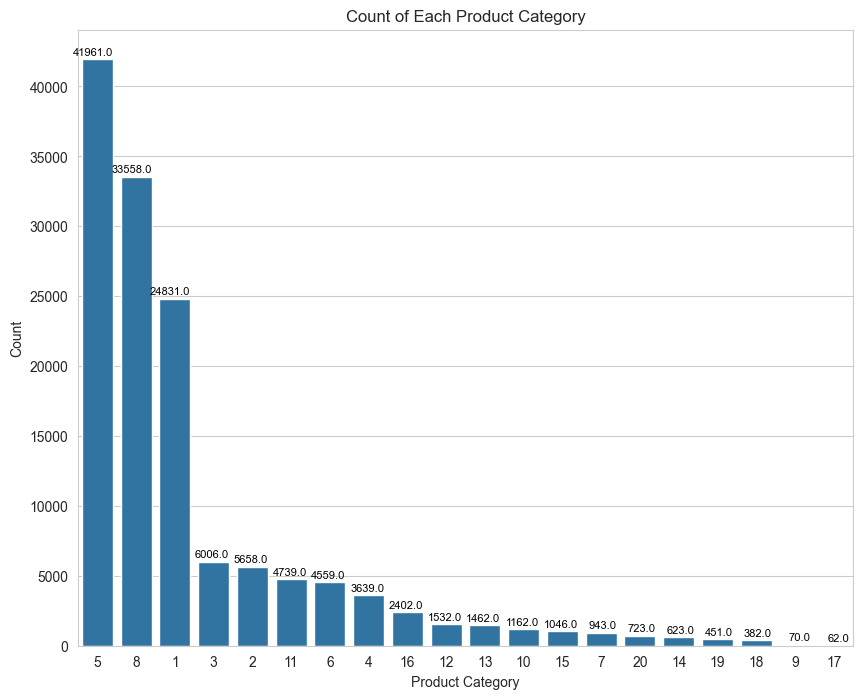

In [141]:
plt.figure(figsize=(10, 8))
sns.countplot(data=female, x='Product_Category', order=female['Product_Category'].value_counts().index)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Each Product Category')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 1., p.get_height()), 
    ha='right', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

**Conclusion:**

*The top selling products categories are 5, 8, 1, 3 and 5*

*The low selling product categories are 20,14,19,18,9 and 17*

# **Lets analyse the Married male and Single male purchase**

In [142]:
male= df[df['Gender']=='M']
df_single_male = male[male['Marital_Status']=='Single']['Purchase']
#sns.histplot(df_single_female)
#plt.show()
sample_10000_single_male = [np.mean(df_single_male.sample(20000)) for i in range(30000)]
#sns.histplot(sample_10000_single_female)
#plt.show()
single_male_sample_10000 = np.array(sample_10000_single_male)
print(f"The single male population mean: {np.round(df_single_male.mean(),3)}\nThe single male Population Standard deviation: {np.round(df_single_male.std(),3)}")
print(f"The single male sample mean: {np.round(single_male_sample_10000.mean(),3)}\nThe single male sample Standard deviation: {np.round(single_male_sample_10000.std(),3)}")

lower_purchase, upper_purchase = confidence_interval(95, single_male_sample_10000.mean(), df_single_male.std()/np.sqrt(20000))
print(f"The Population average single male purchase ranges from {lower_purchase} to {upper_purchase}")

print("="*100)
df_married_male = male[male['Marital_Status']=='Married']['Purchase']
#sns.histplot(df_married_female)
#plt.show()
sample_10000_married_male = [np.mean(df_married_male.sample(20000)) for i in range(30000)]
#sns.histplot(sample_10000_married_female)
#plt.show()
married_male_sample_10000 = np.array(sample_10000_married_male)
print(f"The married male population mean: {np.round(df_married_male.mean(),3)}\nThe married male Population Standard deviation: {np.round(df_married_male.std(),3)}")
print(f"The married male sample mean: {np.round(married_male_sample_10000.mean(),3)}\nThe married male sample Standard deviation: {np.round(married_male_sample_10000.std(),3)}")

lower_purchase, upper_purchase = confidence_interval(95, married_male_sample_10000.mean(), df_married_male.std()/np.sqrt(20000))
print(f"The Population average married male purchase ranges from {lower_purchase} to {upper_purchase}")

The single male population mean: 9453.757
The single male Population Standard deviation: 5101.803
The single male sample mean: 9453.425
The single male sample Standard deviation: 34.512
The Population average single male purchase ranges from 9382.719 to 9524.131
The married male population mean: 9413.818
The married male Population Standard deviation: 5078.027
The married male sample mean: 9413.635
The married male sample Standard deviation: 33.697
The Population average married male purchase ranges from 9343.258 to 9484.011


**Conclusion:**

*The confidence interval overlaps the married male and single male hence we cannot conclude which marital status men purchases more*

# **Top selling product cateogry for Male**

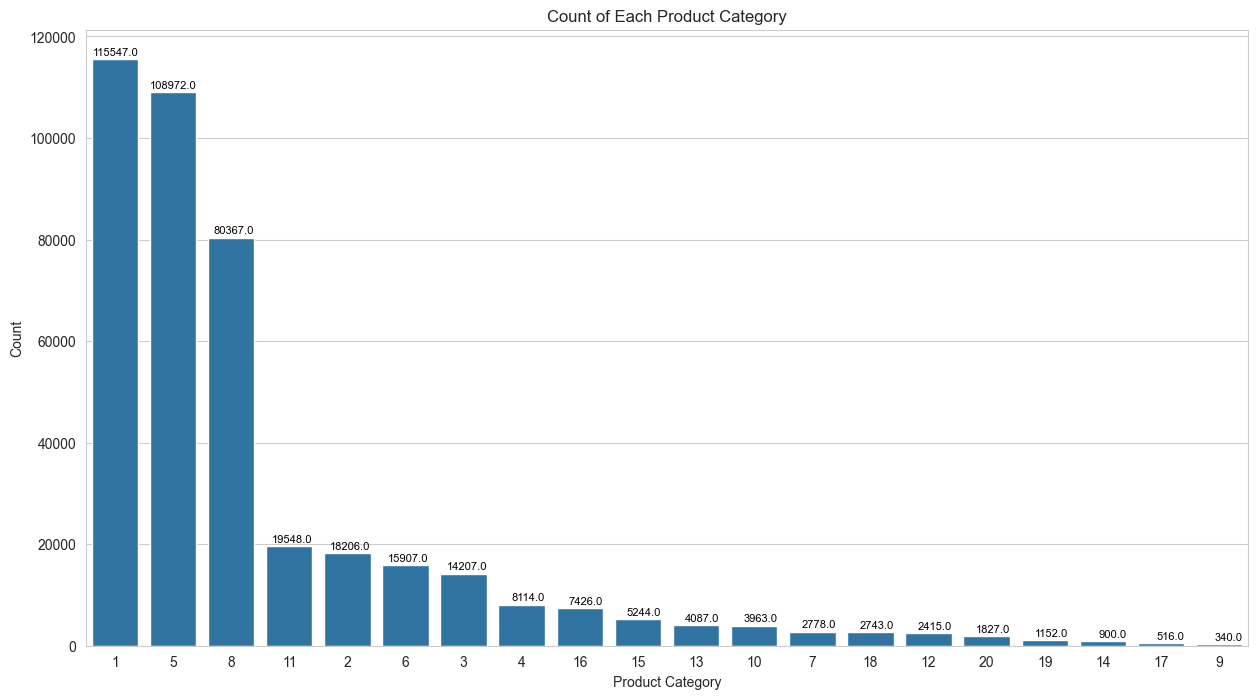

In [143]:
plt.figure(figsize=(15, 8))
sns.countplot(data=male, x='Product_Category', order=male['Product_Category'].value_counts().index)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Each Product Category')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 1., p.get_height()), 
    ha='right', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

**Conclusion:**

*
The top selling products categories ae r1, 5,8, 11 and  2**

The low selling product categories  12, 20, 19, 14, 17 and 9*  17

# **=================================================**

# **Final Insights**

*1. Using the Bi-varient and univarient analysis- Expense of Men is higher compared to the women during the black friday sale of Walmart*

*2. Male gender purchased more- 75% of users are male and 25% are female.*

*3. 26-35 age people purchased more - Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%, and very low users ages ( 0–17 & 55+ )are 5%*

*4. City B people purchased more- 35% stay in a city for 1 year, 18% stay in a city for 2 years, 17% stay in a city for 3 years, and 15% stay in a city for 4+ years.*

*5. Single people purchased more compared to the married people- 60% of users are single, and 40% are married.*

*6. For each **age** category Male gender is higher when compared to female gender in transactions*

*7. Except 18th Occupation all other occupations male purchase rate is higher compared to the Female*

*8. In all the 3 City category male purchase rate is higher*

*9. Based on the Marital Status male purchase rate is higher*

*10. Based on the product category- 2,3,4,5,7,8,9,10,12,13,14,19,20 For these products female purchase rate is higher when compared to the male*




# **Final Recommendations:**

*1. Based on the confidence interval the purchase rate of men is higher to women statistically hence Walmart has to focus on retaining female customers and getting more female customers by providing offers.*

*2. Especially Single marital status women purchase rate is less compared to married women statistically, Walmart has to focus on the Single women Caegory products and discounts.*

*3. Male customers and their purchase is already higher so walmart can focus on retaining the existing customers with new offers.*

*4. **51-55 age category purchase interval is higher** than 0-17, 18-25, 26-35, 55+ categories. So, Walmart can focus on the other category people especially 0-17 and 18-25 Category people*

*5. The top selling products categories for females are 5, 8, 1, 3 and 5*

*6. The low selling product categories for females are 20,14,19,18,9 and 17*

*7. The top selling products categories for male are 5, 8, 1, 11, and 2*

*8. The low selling product categories for male are 20, 19, 18, 14, 9 and 17*

*9. Hence the product categories which are low selling such as **20, 14, 19, 18, 9 and 17** walmart has to take necessary actions to improve the sales of these cateogries like offers, discounts.*